<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Customer_Segmentation/Download_Final_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

In [2]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [3]:
# reading data into dataframe
df=pd.read_csv('Preprocessed_Customer_Data.csv')
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
#Normalize Data
df1 = df.copy()
scaler= StandardScaler()
scaled_features=scaler.fit_transform(df1)
scaled_df=pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.299303,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.100137,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.090437,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.359042,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.254222,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.338109,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.240917,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.323750,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.335167,0.329128,-4.126919


In [5]:
#Using El-Bow method for calculate K value
#Parameters of K mean
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [6]:
cluster_range = range( 1, 11 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    cluster_errors.append( kmeans.inertia_)

determine the optimal number of clusters (k) for a K-Means clustering algorithm by calculating the inertia (sum of squared distances of samples to their closest cluster center) for different values of k

In [7]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,152133.000000
1,2,127772.391551
2,3,111960.243880
3,4,99051.610419
4,5,91480.501683
5,6,84813.962815
6,7,79845.460097
7,8,75183.152611
8,9,70889.353369
9,10,66456.855070


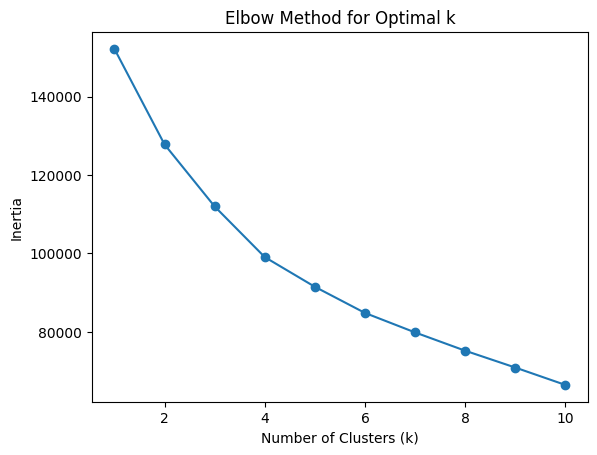

In [8]:
# Plot the Elbow Curve
plt.plot(clusters_df['num_clusters'], clusters_df['cluster_errors'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [9]:
# Now we are going to implement Elbow method to final optimal number of clusters
from kneed import KneeLocator
k1=KneeLocator(range(1,11),cluster_errors , curve='convex', direction= 'decreasing')
k1.elbow

np.int64(4)

According to the elbow method, the ideal cluster number for the k-means algorithm is 4. We will now assess this finding using internal validation methods. In this case, we will employ the silhouette score and the Calinski-Harabasz score

   Number of Clusters (k)  Silhouette Score  Calinski-Harabasz Score  \
0                       2          0.511472              3645.001489   
1                       3          0.466977              3079.258681   
2                       4          0.465740              2693.166742   
3                       5          0.379291              2588.933551   
4                       6          0.393412              2501.656982   
5                       7          0.370007              2543.664692   
6                       8          0.381874              2500.995310   
7                       9          0.354504              2419.263536   
8                      10          0.363975              2355.056303   

   Davies-Bouldin Score  
0              1.242179  
1              1.190413  
2              1.106912  
3              1.307303  
4              1.193206  
5              1.116767  
6              1.101814  
7              1.103011  
8              1.068952  


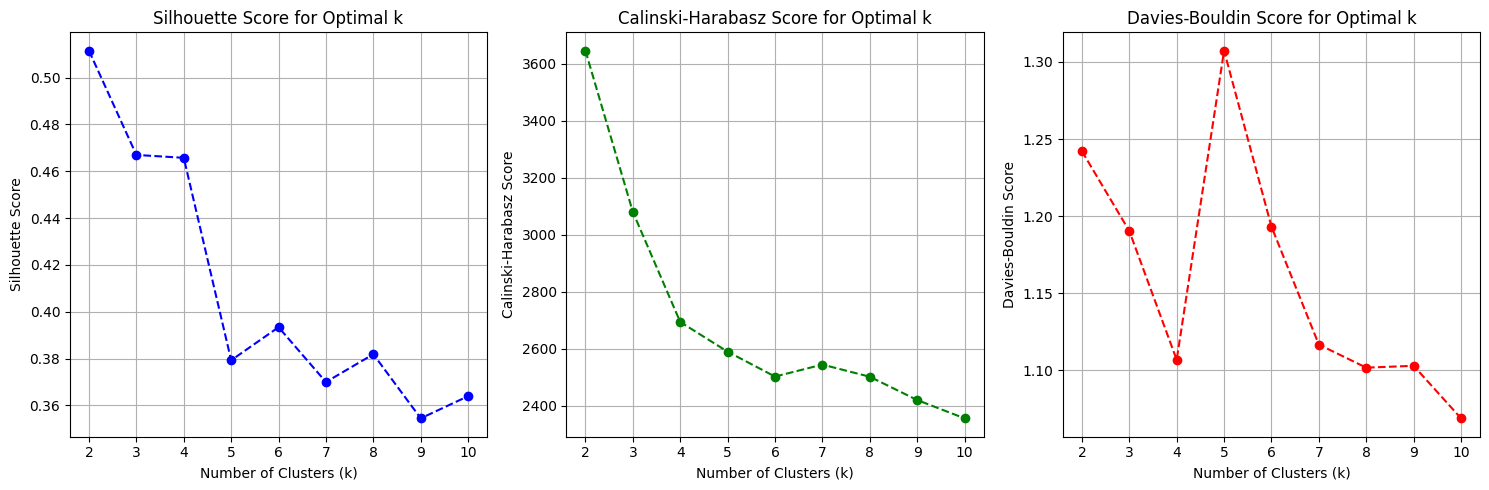

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define the range of clusters to test
k_range = range(2, 11)

# Initialize lists to store scores
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Loop through each cluster number and calculate scores
for k in k_range:
    # Create and fit K-Means model
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df1)

    # Calculate Silhouette Score
    silhouette = silhouette_score(df1, kmeans.labels_)
    silhouette_scores.append(silhouette)

    # Calculate Calinski-Harabasz Score
    calinski_harabasz = calinski_harabasz_score(df1, kmeans.labels_)
    calinski_harabasz_scores.append(calinski_harabasz)

    # Calculate Davies-Bouldin Score
    davies_bouldin = davies_bouldin_score(df1, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin)

# Create a DataFrame to store the results
scores_df = pd.DataFrame({
    'Number of Clusters (k)': k_range,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Score': calinski_harabasz_scores,
    'Davies-Bouldin Score': davies_bouldin_scores
})

# Display the DataFrame
print(scores_df)

# Plot the scores
plt.figure(figsize=(15, 5))

# Silhouette Score Plot
plt.subplot(1, 3, 1)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)

# Calinski-Harabasz Score Plot
plt.subplot(1, 3, 2)
plt.plot(k_range, calinski_harabasz_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Optimal k')
plt.grid(True)

# Davies-Bouldin Score Plot
plt.subplot(1, 3, 3)
plt.plot(k_range, davies_bouldin_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()

k=3 is a strong candidate for the optimal number of clusters because:

It has high Silhouette and Calinski-Harabasz Scores, indicating well-defined and well-separated clusters.

It has a reasonable Davies-Bouldin Score, suggesting that clusters are not too similar to each other.

K=2, is oversimplification and K=4 has Lower Silhouette and Calinski-Harabasz Scores and With 4 clusters, there's a higher risk of creating clusters that are too specific or artificial, which may not generalize well to new data (risk of overfitting)

**Finally I selected the best K value is 3(K=3)**

In [11]:
#Train the model with k=3

from sklearn.cluster import KMeans
import pandas as pd

# Fit the K-Means model with k=3
kmeans = KMeans(n_clusters=3, **kmeans_set).fit(df1)

# Get the cluster labels for each data point
pred = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for better visualization
centroids_df = pd.DataFrame(data=centroids, columns=df1.columns)

# Transpose the centroids DataFrame for easier interpretation
centroids_transposed = centroids_df.T

# Display the transposed centroids
print(centroids_transposed)

                                             0            1            2
BALANCE                            4841.893262   857.363709  3414.114536
BALANCE_FREQUENCY                     0.911252     0.854753     0.940489
PURCHASES                         10789.305615   606.218530  1587.227026
ONEOFF_PURCHASES                   7619.684385   314.255591   991.921865
INSTALLMENTS_PURCHASES             3169.790462   292.260629   595.620141
CASH_ADVANCE                       5152.220129   496.022436  2131.085843
PURCHASES_FREQUENCY                   0.752378     0.468106     0.539643
ONEOFF_PURCHASES_FREQUENCY            0.599535     0.154692     0.317396
PURCHASES_INSTALLMENTS_FREQUENCY      0.604123     0.352490     0.385298
CASH_ADVANCE_FREQUENCY                0.226540     0.106767     0.211627
CASH_ADVANCE_TRX                      9.200000     2.255118     5.771227
PURCHASES_TRX                        86.200000    10.690498    22.202816
CREDIT_LIMIT                      12465.769231  276

In [12]:
# adding the clusters column to the main dataframe
df_kmeans = pd.concat([df, pd.DataFrame(pred, columns=['cluster'])], axis = 1)
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6,1
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [13]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [100, 200, 300]
}

# Initialize the best score and best parameters
best_silhouette_score = -1
best_params = {}

# Perform grid search
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)
    kmeans.fit(scaled_features)

    # Calculate the Silhouette Score
    silhouette = silhouette_score(scaled_features, kmeans.labels_)

    # Update the best score and parameters if the current score is better
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_params = params

# Fit the model with the best parameters
best_kmeans = KMeans(**best_params, random_state=42)
best_kmeans.fit(scaled_features)

# Calculate evaluation metrics
silhouette = silhouette_score(scaled_features, best_kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(scaled_features, best_kmeans.labels_)
davies_bouldin = davies_bouldin_score(scaled_features, best_kmeans.labels_)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

# Add cluster labels to the main DataFrame
df_kmeans = pd.concat([df, pd.DataFrame(best_kmeans.labels_, columns=['cluster'])], axis=1)



Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 20}
Silhouette Score: 0.250731441320459
Calinski-Harabasz Score: 1604.9896451067566
Davies-Bouldin Score: 1.5965092551514042


<ipython-input-14-924dcfb9ede2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-924dcfb9ede2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-924dcfb9ede2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-924dcfb9ede2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-924dcfb9ede2>:13: FutureWarning: 

Passing `pa

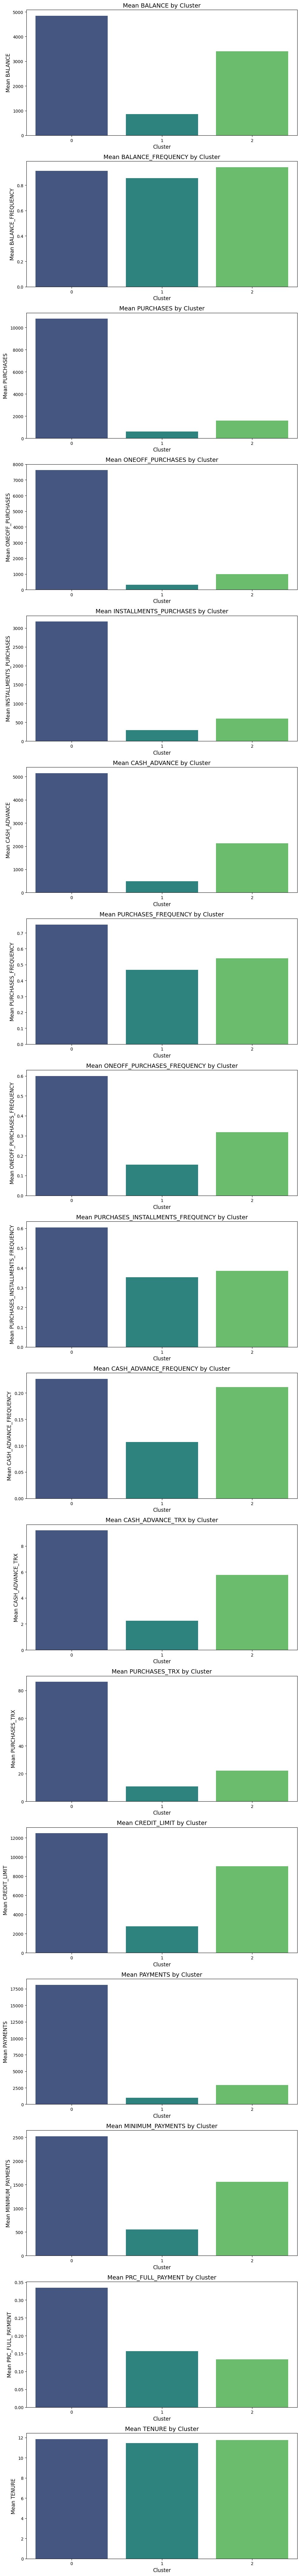

In [14]:
# Add cluster labels to the main DataFrame
df_kmeans = pd.concat([df, pd.DataFrame(pred, columns=['cluster'])], axis=1)

# Calculate mean values for each feature by cluster
cluster_means = df_kmeans.groupby('cluster').mean()

# Plot bar graphs for each feature
num_features = len(cluster_means.columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature and create a bar plot
for i, feature in enumerate(cluster_means.columns):
    sns.barplot(
        x=cluster_means.index,  # Cluster labels (x-axis)
        y=cluster_means[feature],  # Mean values of the feature (y-axis)
        ax=axes[i],  # Assign subplot to the current axis
        palette='viridis'  # Color palette
    )
    axes[i].set_title(f'Mean {feature} by Cluster', fontsize=14)
    axes[i].set_xlabel('Cluster', fontsize=12)
    axes[i].set_ylabel(f'Mean {feature}', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-15-8fa623567047>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[0, 0] = sns.countplot(data=data, x='cluster', palette="pink", ax=ax[0, 0])
<ipython-input-15-8fa623567047>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0)


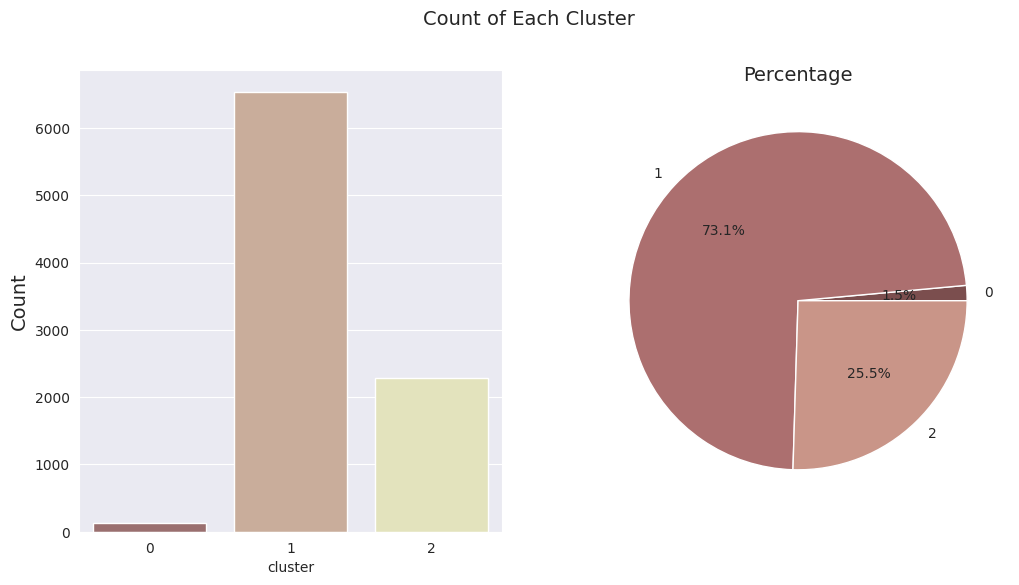

In [15]:
# Visualize count of each custer
def check_result(data,plot=False):
    if plot:
        sns.set_style('darkgrid')
        fig, ax = plt.subplots(1, 2)
        ax = np.reshape(ax, (1, 2))
        ax[0, 0] = sns.countplot(data=data, x='cluster', palette="pink", ax=ax[0, 0])
        ax[0, 0].set_ylabel('Count',fontsize=14)
        ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0)
        slices = data['cluster'].value_counts().sort_index().values
        activities = [var for var in data['cluster'].value_counts().sort_index().index]
        ax[0, 1] = plt.pie(slices, labels=activities,
                           colors=sns.color_palette('pink'), autopct='%1.01f%%')
        plt.title("Percentage",fontsize=14)
        fig.set_size_inches(12, 6)
        fig.suptitle('Count of Each Cluster', fontsize=14)
        plt.show()
check_result(df_kmeans, plot=True)

**Cluster 0: High Spenders**

*Characteristics:*

Very high purchases, cash advances, and payments.

High credit limit and balance.

Frequent purchasers with high purchase frequency.


*Behavior:*

Likely to make large one-off purchases and cash advances.

High engagement with credit card usage.


**Cluster 1: Low Spenders**

*Characteristics*:

Low purchases, cash advances, and payments.

Low credit limit and balance.

Infrequent purchasers with low purchase frequency.


*Behavior:*

Minimal engagement with credit card usage.

Likely to use credit cards for essential purchases only.



**Cluster 2: Moderate Spenders**

*Characteristics:*

Medium purchases, cash advances, and payments.

High credit limit and medium balance.

Moderate purchase frequency and one-off purchases.

*Behavior:*

Balanced credit card usage.

Likely to make both one-off and installment purchases.


**Use these labeled clusters to segment these customers and tailor marketing strategies.**

Target **Cluster 0** with premium offers and loyalty programs.

Encourage **Cluster 1** to increase credit card usage with low-cost incentives.

Offer installment plans and cashback deals to **Cluster 2**.

In [18]:
# Assuming your original data (before preprocessing) had Customer IDs
# If not, we'll create sequential IDs

# Add Customer ID column (if not already present)
if 'CustomerID' not in df_kmeans.columns:
    df_kmeans.insert(0, 'CustomerID', range(1, len(df_kmeans)+1))

# Calculate cluster counts
cluster_counts = df_kmeans['cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)

# Reorder columns to have CustomerID first and cluster last
columns_order = ['CustomerID'] + [col for col in df_kmeans.columns if col not in ['CustomerID', 'cluster']] + ['cluster']
df_kmeans = df_kmeans[columns_order]

# Display the final dataframe with Customer IDs and clusters
print("\nFinal DataFrame with Customer IDs and Clusters:")
display(df_kmeans.head())



Cluster Counts:
cluster
0     130
1    6539
2    2280
Name: count, dtype: int64

Final DataFrame with Customer IDs and Clusters:


,CustomerID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,2,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,3,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,4,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2
4,5,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [19]:
# Save to CSV
df_kmeans.to_csv('Clustered_Customer_Data.csv', index=False)

# Download the file
from google.colab import files
files.download('Clustered_Customer_Data.csv')

# Show cluster counts (optional)
print("\nCluster Counts:")
print(df_kmeans['cluster'].value_counts().sort_index())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Cluster Counts:
cluster
0     130
1    6539
2    2280
Name: count, dtype: int64
